In [131]:
import matplotlib.pyplot as plt
import numpy as np

#this is the simualtion code for a set up with 2 polarizing beam splitters, 4 HWPs, 1 polarizer, 1 normal beamsplitter, and a mirror

#polarization x1= polarization rotation angle one
#polarization x2= polarization rotation angle two
#polarization x3= polarization rotation angle three

"________________________________________________________________________________________________________________________________________________"
# Half Waveplate function
# x = rotation angle of HWP
def HWP(x1):
    hwp = np.array(([np.cos(x1)**2 - np.sin(x1)**2, 2*np.cos(x1)*np.sin(x1)], [2*np.cos(x1)*np.sin(x1), np.sin(x1)**2 - np.cos(x1)**2])) #half waveplate matrix
# simplifiy HWP with trig identities
    return(hwp)

# polarizer with leakage
def pol(n=.1):
    hp = np.array([[np.sqrt(1-n**2), 0],[0, n]]) #polarizer
    return(hp)

# polarizer on rotation mount
def rm(x1,n=.1):
    RM = np.array([[np.cos(np.deg2rad(x1)),-np.sin(np.deg2rad(x1))],[np.sin(np.deg2rad(x1)),np.cos(np.deg2rad(x1))]])
    p = pol(n=n)
    RMT = RM.transpose()
    R = RM @ p @ RMT
    return(R)

#last polarizing beamsplitter before quad-detector
def lp(x4,n = 0):
    p = np.array([[np.sqrt(1-n**2), 0],[0, n]])
    return(p)


"_____________________________________________________________________________________________________________________________________________"



def IH(x1,x3,thetamin = 135, thetamax = 145):
    x4 = 0
    #make a function that spits out whatever your lights going to be depending on polarization (nothing should be set since we can )
    "gives the intensity going to the dark port"
    L = np.array([1,0]) # laser light going into interferometer horizonatlly polarized
    acw = HWP(x1) @ pol(n=.1) @ HWP(x1) # polarizer 1 with light coming in at a clockwise direction ( HWP @ pol@ )make sure both HWP can have dif angles
    accw = HWP(-x1) @ pol(n=.1) @ HWP(-x1) # polarizer 1 with light coming in at a counterclockwise direction
    ccw = HWP(x3) @ pol(n=.1) @ HWP(x3) # polarizer 3 with light coming in at a clockwise direction
    cccw = HWP(-x3) @ pol(n=.1) @ HWP(-x3) # polarizer 3 with light coming in at a counterclockwise direction
    d = lp(x4,n=0) # perfect polarizer between exiting light and detector
    DI = [] # darkport intensity
    x2s = np.arange(thetamin,thetamax,.1) # making an array of all the different rotation angles of polarizer between set max and min angles

    for x2 in x2s: 
        "iterating over all the different angles to get insentities at that set angle and putting the intensities into a list"
        bcw = rm(x2,n=.1) # polarizer 2 with light coming in at a clockwise direction
        bccw = rm(-x2,n=.1) # polarizer 2 with light coming in at a counterclockwise direction
        A = (((cccw@ bccw@ accw) -(acw@ bcw@ ccw))/2)
        B = ((accw@ bccw@ cccw-ccw@ bcw@ acw)/2)
        C = (L@(A)@ d@ (B)@ L)
        DI.append(C)
    
    #ID = np.array(DI)
    return(x2s,np.array(DI))


def IV(x1,x3,thetamin = 135, thetamax = 145):
    "gives the intensity going to the bright port"
    x4=90
    L = np.array([1,0])
    acw = HWP(x1) @ pol(n=.1) @ HWP(x1)
    accw = HWP(-x1) @ pol(n=.1) @ HWP(-x1)
    ccw = HWP(x3) @ pol(n=.1) @ HWP(x3)
    cccw = HWP(-x3) @ pol(n=.1) @ HWP(-x3)
    d = lp(x4,n=0)
    BI = []
    x2s = np.arange(thetamin,thetamax,.1)

    for x2 in x2s:
        bcw = rm(x2,n=.1)
        bccw = rm(-x2,n=.1)
        B = ((ccw@ bcw@ acw+accw@ bccw@ cccw)/2)
        A = ((acw@ bcw@ ccw+ cccw@ bccw@ accw)/2)
        C = (L@(A)@ d@(B)@ L)
        BI.append(C)

            # make cccw@ bccw@ accw  and acw@ bcw@ ccw sepearate func to look light to see what they look like at those points write so consistant with written math
    IB = np.array(BI)
    return(x2s,IB)





def vertical(x1,x3,thetamin, thetamax):
    "this plots the the vertical light coming out of the dark port"
    x2s,Br = IV(x1,x3,thetamin, thetamax)
    f=plt.figure(figsize=(4,3))

    plt.plot(x2s,Br,color="purple")
    plt.xlabel(r'$\phi$ (deg)')
    plt.ylabel(r'$I_b/I_0$')
    plt.title('Vertical Dark Port Intensity vs Polarizer Angle')
    #plt.ylim((.02,.08))
    plt.grid(True)
    plt.xlim((thetamin,thetamax))
    plt.show()
    return(f)

def horizontal(x1,x3,thetamin, thetamax):
    "this plots the horizontal light coming out of the darkport"
    x2s,Da = IH(x1,x3,thetamin, thetamax)
    f=plt.figure(figsize=(4,3))

    plt.plot(x2s,Da,color="magenta")
    plt.xlabel(r"$\phi$ (deg)")
    plt.ylabel(r"$I_d/I_0$")
    plt.title("Horizontal Dark Port Intensity vs Polarizer Angle")
    #plt.ylim((.02,.08))
    plt.grid(True)
    plt.xlim((thetamin,thetamax))
    plt.show()
    return(f)

def split(x1,x3,thetamin, thetamax):
    "bright port minus dark ratio to total initial intensity"

    x2s,Br = IV(x1,x3,thetamin, thetamax)
    print(Br)
    x2s,Da = IH(x1,x3,thetamin, thetamax )
    print(Da)
    s = Da-Br / (Da+Br)
    print(s)
    f=plt.figure(figsize=(4,3))

    plt.plot(x2s,s,color="aqua")
    plt.xlabel(r'$\phi$ (deg)')
    plt.ylabel(r'$(I_d-I_b)/(I_b+I_d)$')
    plt.title('Intensity Difference')
    #plt.ylim((-1,0.25))
    plt.xlim((thetamin,thetamax))
    plt.grid(True)
    plt.show()
    return(f)


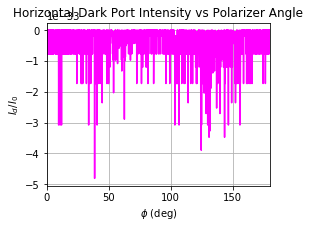

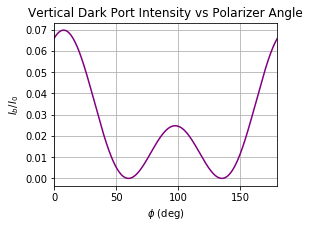

[0.06587397 0.06597283 0.06607049 ... 0.06557023 0.06567267 0.06577392]
[-7.70371978e-34 -7.70371978e-34  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-1. -1. -1. ... -1. -1. -1.]


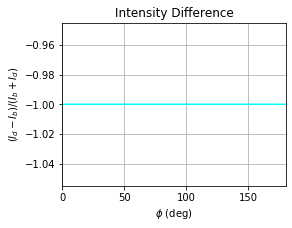

In [132]:
# Intesity going to darkport

x1 = -60
x3 = 123
thetamin=0
thetamax = 180


DP = horizontal(x1,x3,thetamin, thetamax)
DP.savefig("DP.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intesity going to brightport

BP = vertical(x1,x3,thetamin, thetamax)
BP.savefig("BP.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

SP = split(x1,x3,thetamin, thetamax)
SP.savefig("SP.png", dpi=600,pad_inches=0.25,bbox_inches="tight")

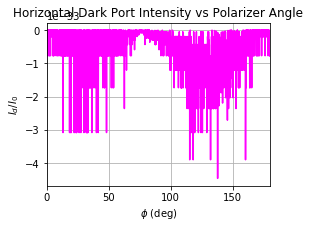

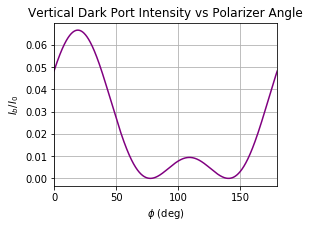

[0.0483747  0.04854321 0.04871126 ... 0.04786647 0.04803632 0.04820573]
[-1.92592994e-34  0.00000000e+00 -1.92592994e-34 ... -7.70371978e-34
 -1.92592994e-34 -7.70371978e-34]
[-1. -1. -1. ... -1. -1. -1.]


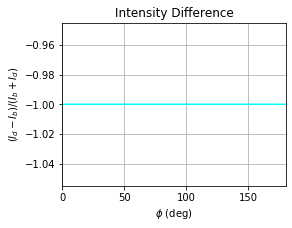

In [141]:
x1 = 10
x3 = -8
thetamin=0
thetamax = 180


DP = horizontal(x1,x3,thetamin, thetamax)
DP.savefig("DP.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intesity going to brightport

BP = vertical(x1,x3,thetamin, thetamax)
BP.savefig("BP.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

SP = split(x1,x3,thetamin, thetamax)
SP.savefig("SP.png", dpi=600,pad_inches=0.25,bbox_inches="tight")